In [93]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

Found 28709 images belonging to 7 classes.
Found 7179 images belonging to 7 classes.
Epoch 1/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.2405 - loss: 1.8380 - val_accuracy: 0.2479 - val_loss: 1.7989
Epoch 2/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2500 - loss: 1.7789 - val_accuracy: 0.2482 - val_loss: 1.7988
Epoch 3/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.2555 - loss: 1.7988 - val_accuracy: 0.2483 - val_loss: 1.7860
Epoch 4/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2188 - loss: 1.7204 - val_accuracy: 0.2480 - val_loss: 1.7869
Epoch 5/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.2500 - loss: 1.7952 - val_accuracy: 0.2510 - val_loss: 1.7802
Epoch 6/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1562 - loss: 1.8427 - val_accuracy: 0.2522 - val_loss: 1.7807
Epoch 7/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.2499 - loss: 1.7914 - val_accuracy: 0.2494 - val_loss: 1.7675
Epoc

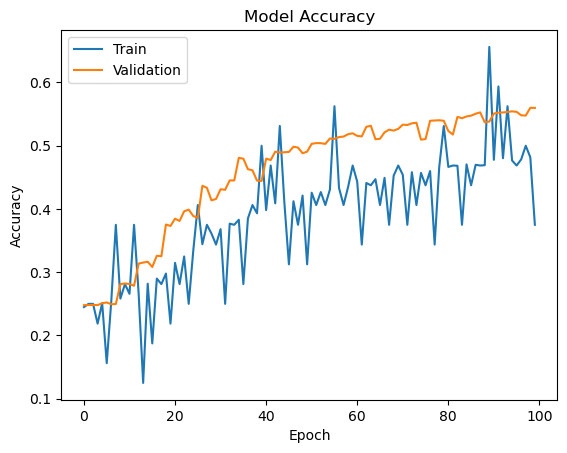

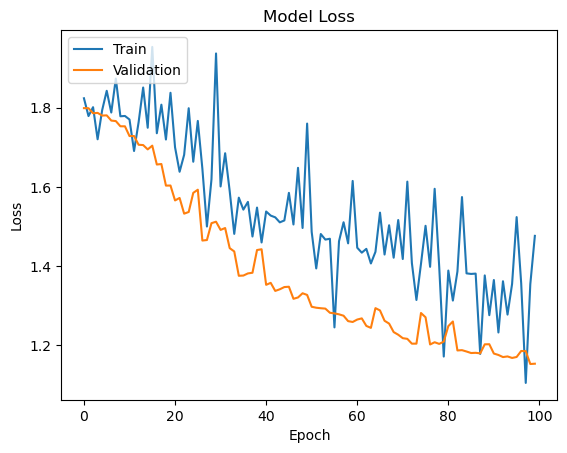

In [94]:
# Define image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load train and test datasets
train_generator = train_datagen.flow_from_directory(
    'train/',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'test/',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

# Create the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training history (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


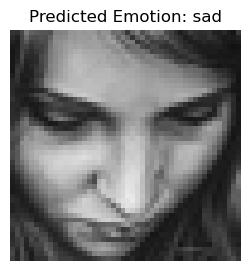

Image: test/sad\PublicTest_75294662.jpg, Predicted Emotion: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


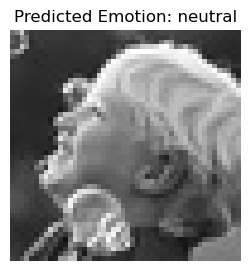

Image: test/happy\PrivateTest_73219906.jpg, Predicted Emotion: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


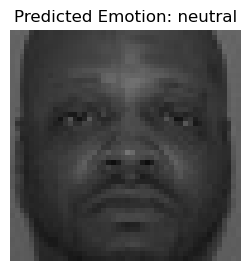

Image: test/neutral\PublicTest_69405051.jpg, Predicted Emotion: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


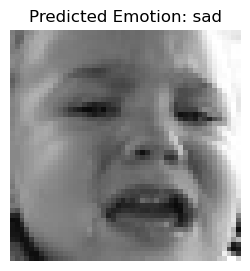

Image: test/sad\PrivateTest_8044870.jpg, Predicted Emotion: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


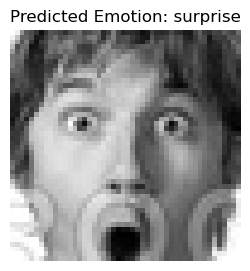

Image: test/surprise\PublicTest_45072574.jpg, Predicted Emotion: surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


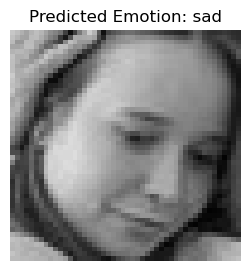

Image: test/sad\PublicTest_2906783.jpg, Predicted Emotion: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


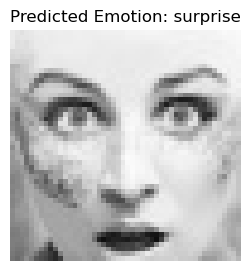

Image: test/surprise\PrivateTest_18486097.jpg, Predicted Emotion: surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


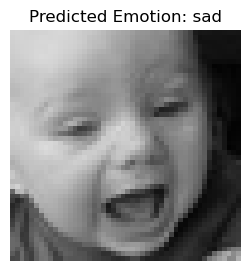

Image: test/angry\PrivateTest_35600895.jpg, Predicted Emotion: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


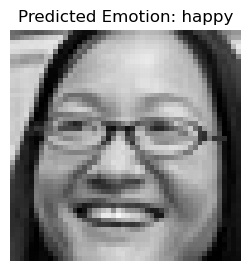

Image: test/happy\PublicTest_60919933.jpg, Predicted Emotion: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


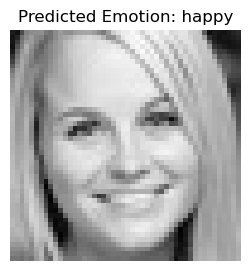

Image: test/happy\PrivateTest_62698221.jpg, Predicted Emotion: happy


In [95]:
# Function to predict emotion from a single image
def predict_single_image(image_path):
  """
  Predicts the emotion in a single image and displays it.

  Args:
    image_path: Path to the image file.

  Returns:
    Predicted emotion label.
  """
  try:
      img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
      if img is None:
          print(f"Error: Could not read image from {image_path}")
          return None 

      img = cv2.resize(img, (48, 48))
      img = img / 255.0
      img = np.expand_dims(img, axis=0)  # Add batch dimension
      img = np.expand_dims(img, axis=-1)  # Add channel dimension (grayscale)

      prediction = model.predict(img)

      # Get class labels from the test generator
      class_labels = list(test_generator.class_indices.keys())

      # Get the predicted class index
      predicted_class_index = np.argmax(prediction)

      # Get the predicted emotion label
      predicted_emotion = class_labels[predicted_class_index] 

      # Display the image with predicted emotion
      plt.figure(figsize=(3, 3)) 
      plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
      plt.title(f"Predicted Emotion: {predicted_emotion}")
      plt.axis('off') 
      plt.show() 

      return predicted_emotion 
  except Exception as e:
      print(f"Error processing image: {e}")
      return None

# Get a list of image paths from the 'test' directory
test_image_paths = [os.path.join('test/', folder, file) 
                    for folder in os.listdir('test') 
                    for file in os.listdir(os.path.join('test', folder))]

# Select a random subset of 10 images for testing
selected_image_paths = np.random.choice(test_image_paths, size=10, replace=False)

# Predict emotions for selected test images
for image_path in selected_image_paths:
  predicted_emotion = predict_single_image(image_path)
  if predicted_emotion:  # Check if prediction was successful
      print(f"Image: {image_path}, Predicted Emotion: {predicted_emotion}")